<a href="https://colab.research.google.com/github/seyoung911/ClearWater/blob/master/assignment06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


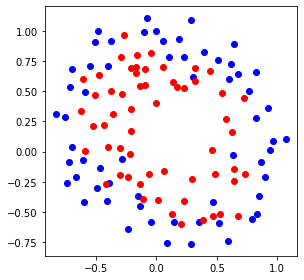

In [4]:
import numpy as np
import matplotlib.pyplot as plt

path = "/content/drive/My Drive/Colab Notebooks/data-nonlinear.txt"

data    = np.genfromtxt(path, delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]


# 1. Plot training data
plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()



In [58]:
import math
import numpy
from numpy import asarray

#2. g(X,Y;세타) latex 형식으로 wrtie down

#코드 구성 
# (1) g(X,Y;theta) 정의 : 상수 + x + y + x^2 + xy + y^2 꼴

def g_function( xi, yi, theta): #theta[]로 안해도됨?********************************************************************
  result = theta[0] + theta[1] * xi**2 + theta[2] * yi**2 + theta[3] * xi**4 
  return result

# (2) sigmoid 함수 정의

def sigmoid (input):  # input 은 float type
  return 1 / (1 + math.exp(-input))

print(sigmoid(233))
# (3) 배열, 변수 정의


row = 118 # 행 갯수
column = 4 # 열 갯수
BJ = 0 # training accuracy 계산시 사용할 분자값
a = 0.01 # learning rate , 알파 대신 a 씀
numOfData = len(pointX) # 데이터 개수, 트레이닝 횟수 , 이터레이션 횟수 = 118
g = 0 # g_function result값 넣을 변수

defender = 1e-5 # 도메인에러 방지

cost_List = [] # cost function (Objective function) 결과값 넣을 배열 
training_Accuracy = [] #Training accuracy 넣을 배열
theta_Array = [[0 for i in range(column)] for j in range(row)] #업데이트한 theta값 넣을 2차원배열 118행 6열(세타 0~세타5)
sigmoid_Array = [] #Gradient Descent할 때 쓰이는 시그모이드식 넣을 배열
temp = [] # cost 값 계산할때 평균 구할 array / temp.mean()해서 cost_List에 하나씩 넣을거임

# 세타 초기값 임의 설정
theta_Array[0][0] = -1
theta_Array[0][1] = 1
theta_Array[0][2] = -1
theta_Array[0][3] = -0.05


# (4) cost function (objective fuction) 디자인

for j in range(numOfData) :
  temp.clear() # 매 이터레이션마다 임시 어레이 초기화
  sigmoid_Array.clear() # 매 이터레이션마다 6
  BJ = 0 # 매 이터레이션마다 분자 0으로 초기화
  
  for i in range(numOfData) : # i : 0 ~ 117
  
    g = g_function(pointX[i], pointY[i], theta_Array[j]) # 출력 에러 없음 확인
    #print("g= ", g)
    temp.append(-label[i] * math.log(sigmoid(g) + defender) - (1 - label[i]) * math.log( 1 - sigmoid(g) + defender) ) # math domain error 아마도 0일때가 있어서 그런듯? defender활용
   # print("label = ", label[i],"/n")
    #print("i=", i, " sigmoid(g) = ", sigmoid(g) )
   # print("math.log(sigmoid(g) = ", math.log(sigmoid(g)), "/n")
   # print("math.log(sigmoid(g)+defender = ", math.log(sigmoid(g) +defender), "/n")
   # print("math.log(1-sigmoid(g)+defender) = ", math.log( 1 - sigmoid(g) + defender),"/n")
    sigmoid_Array.append(sigmoid(g))

    # ********************* bitwise 곱 찾아보기 ****************************
    
    if ( (label[i] == 1) & (sigmoid(g) > 0.5) ) : BJ = BJ + 1
    elif ( (label[i] == 0) & (sigmoid(g) < 0.5) ) : BJ = BJ + 1
     
  cost_List.append(asarray(temp).mean()) # cost_List[j] 채우기
  training_Accuracy.append( BJ / numOfData ) # training_Accuracy[j] 채우기



  # theta값들 업데이트 / 여기 체크하기
  if (j == numOfData - 1) : break

  theta_Array[j+1][0] = (theta_Array[j][0] - a*((asarray(sigmoid_Array) - asarray(label)).mean()))
  theta_Array[j+1][1] = (theta_Array[j][1] - a*((asarray(sigmoid_Array) - asarray(label)).mean()))*pointX[j]*pointX[j]
  theta_Array[j+1][2] = (theta_Array[j][2] - a*((asarray(sigmoid_Array) - asarray(label)).mean()))*pointY[j]*pointY[j]
  theta_Array[j+1][3] = (theta_Array[j][3] - a*((asarray(sigmoid_Array) - asarray(label)).mean()))*pointX[j]*pointX[j]*pointX[j]*pointX[j]
  

print(cost_List)

1.0
[0.8469210949261932, 0.8235588526389587, 0.8117797792562046, 0.8067902867027643, 0.8035323991846407, 0.8023576307301391, 0.8017097200204389, 0.8012232495349821, 0.8007408277388447, 0.8002541493902294, 0.7997675614334206, 0.7992841632559872, 0.7988127229703327, 0.7983615475718794, 0.7978961147806686, 0.7974126458928097, 0.7969373059806817, 0.7964753593145298, 0.7959801375973892, 0.7955196276531185, 0.7950715437988832, 0.7946249287364126, 0.7941986937026622, 0.7937567063997866, 0.7933008759073906, 0.7928472481259926, 0.7923842972000933, 0.7919393711912679, 0.7914978364334748, 0.7910537838686736, 0.7905872924591112, 0.7900989211289469, 0.7896618782703781, 0.7892622331405461, 0.7888681812147532, 0.7884561748895518, 0.7880346695548457, 0.7876042489725313, 0.7871788148618534, 0.7867547321079242, 0.7863236643847916, 0.7859087767169478, 0.7854913276780184, 0.785076875711207, 0.7846596187452468, 0.7842463540341001, 0.7838305760478161, 0.7834167659560738, 0.78299573518421, 0.7825752637320607

#1. plot training data

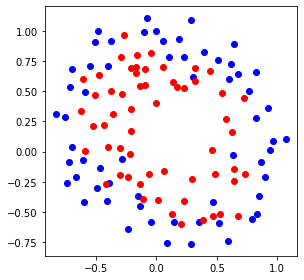

In [19]:
# 1. Plot training data
plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

#2. Wite down g( x , y ; theta) by LaTeX

In [0]:
# latex이용해서 수식 작성하는법 **************

#3. plot the training error

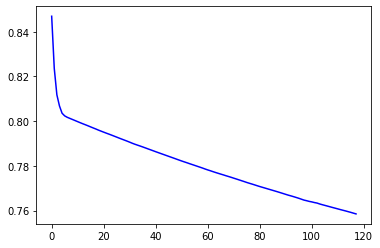

In [61]:
plt.figure()
plt.plot([i for i in range(len(cost_List))],cost_List,color='blue')

#4. plot the training accuracy

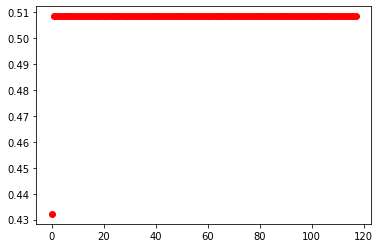

In [55]:
plt.scatter([i for i in range(len(training_Accuracy))],training_Accuracy,color='red')